In [1]:
import numpy
import numpy.random as rng
import theano
import theano.tensor as T
import theano.printing as pr
import theano.d3printing as d3p
from theano.d3printing.formatting import GraphFormatter
from theano import ProfileMode
import pydot as pd

from IPython.display import SVG

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
%load_ext autoreload
%autoreload 2

# Model 

In [3]:
n = 100
m = 50
h = 10

W = theano.shared(np.random.normal(0, 1, (m, h)).astype(theano.config.floatX), borrow=True)
X = T.dmatrix('X')
Z = T.nnet.sigmoid(T.dot(X, W))
zm = T.mean(Z)

predict_profiled = theano.function([X], [Z, zm], profile=True)
data = rng.rand(n, m)
dZ, dzm = predict_profiled(data)

predict_unprofiled = theano.function([X], [Z, zm], profile=False)

In [4]:
gf = GraphFormatter()

# Profiled graphed 

In [5]:
g = gf.to_pydot(predict_profiled)
d3p.d3print(predict_profiled, 'predict_profiled.html')

The output file is available at predict_profiled.html


[open](./predict_profiled.html) 

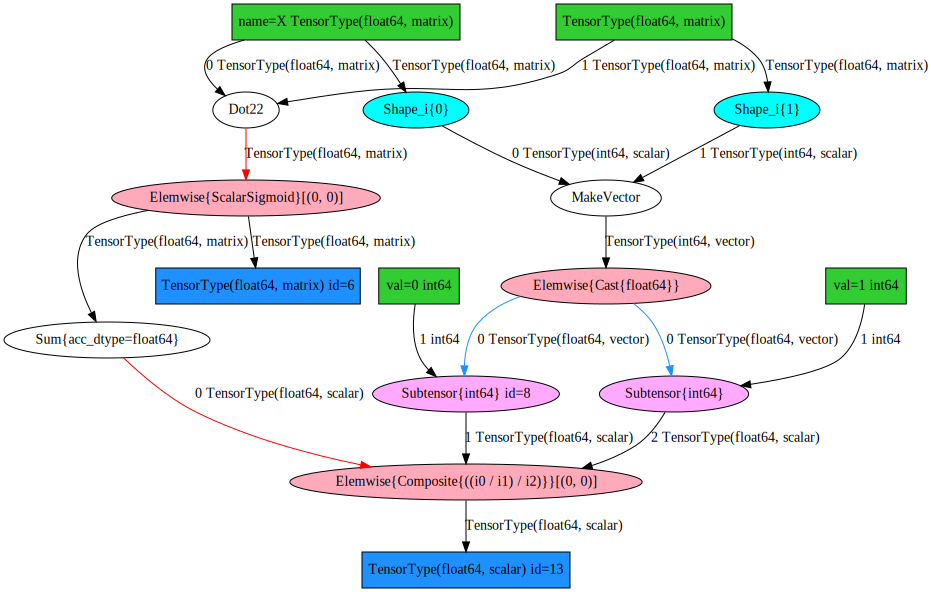

In [6]:
SVG(g.create_svg())

# Unprofiled graph

In [7]:
g = gf.to_pydot(predict_unprofiled)
d3p.d3print(predict_unprofiled, 'predict_unprofiled.html')

The output file is available at predict_unprofiled.html


[open](./predict_unprofiled.html) 

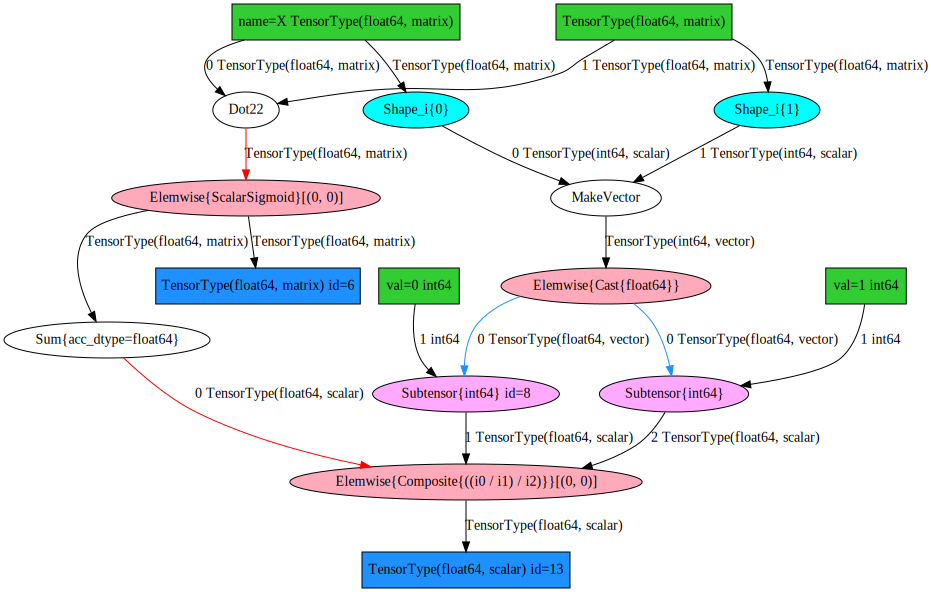

In [8]:
SVG(g.create_svg())